###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> COVID Sentiment Analysis - Stage 4 Lockdown</span>
###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Author: Angel Das</span>



###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Problem Statement</span>
It is importnant to analyze the sentiments of residents in Victoria to get a better picture of their feelings about the Stage 4 lockdown. The analysis aims to utilize tweepy to first scrape the data from twitter and then use Topic Modeling and Sentiment Analyzer to categorize tweets into Sentiments.

In [ ]:
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("")
auth.set_access_token("")

api = tweepy.API(auth)auth

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#covid19"
date_since = "2019-05-01"

In [ ]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=search_words,
              geocode="-37.922570,145.126930,150km",
              lang="en",
              since=date_since).items(100)

In [ ]:
tweets

In [ ]:
# Collect a list of tweets
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

#### Column Description
1. Obtain the following info (methods to call them out):
2. user.screen_name - twitter handle
3. user.description - description of account
4. user.location - where is he tweeting from
5. user.friends_count - no. of other users that user is following (following)
6. user.followers_count - no. of other users who are following this user (followers)
7. user.statuses_count - total tweets by user
8. user.created_at - when the user account was created
9. created_at - when the tweet was created
10. retweet_count - no. of retweets
11. (deprecated) user.favourites_count - probably total no. of tweets that is favourited by user
12. retweeted_status.full_text - full text of the tweet
13. tweet.entities['hashtags'] - hashtags in the tweet

In [ ]:
def scraptweets(search_words, date_since, numTweets, numRuns):
    
    # Define a for-loop to generate tweets at regular intervals
    # We cannot make large API call in one go. Hence, let's try T times
    
    # Define a pandas dataframe to store the date:
    db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                        'retweetcount', 'text', 'hashtags']
                                )
    program_start = time.time()
    
    for i in range(0, numRuns):
        # We will time how long it takes to scrape tweets for each run:
        start_run = time.time()
        
        
        tweets = tweepy.Cursor(api.search, q=search_words, geocode="-37.922570,145.126930,150km",\
                               lang="en", since=date_since, tweet_mode='extended').items(numTweets)
        # Store these tweets into a python list
        tweet_list = [tweet for tweet in tweets]
        
    
        # Begin scraping the tweets individually:
        noTweets = 0
    
        for tweet in tweet_list:


        # Pull the values
            username = tweet.user.screen_name
            acctdesc = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            usercreatedts = tweet.user.created_at
            tweetcreatedts = tweet.created_at
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']

            try:
                text = tweet.retweeted_status.full_text
            except AttributeError:  # Not a Retweet
                text = tweet.full_text

    # Add the 11 variables to the empty list - ith_tweet:
            ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                         usercreatedts, tweetcreatedts, retweetcount, text, hashtags]
    # Append to dataframe - db_tweets
            db_tweets.loc[len(db_tweets)] = ith_tweet
    # increase counter - noTweets  
            noTweets += 1

        # Run ended:
        end_run = time.time()
        duration_run = round((end_run-start_run)/60, 2)

        print('no. of tweets scraped for run {} is {}'.format(i + 1, noTweets))
        print('time take for {} run to complete is {} mins'.format(i+1, duration_run))

        
    # Once all runs have completed, save them to a single csv file:

        from datetime import datetime

        # Obtain timestamp in a readable format
        to_csv_timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
    # Define working path and filename
        path = os.getcwd()
        filename = 'C:/Users/91905/Twitter Data/' + to_csv_timestamp + '_covid_data.csv'
    # Store dataframe in csv with creation date timestamp
        db_tweets.to_csv(filename, index = False)

        program_end = time.time()
        print('Scraping has completed!')
        print('Total time taken to scrap is {} minutes.'.format(round(program_end - program_start)/60, 2))
        
        time.sleep(960) #16 minute sleep time

In [ ]:
import pandas as pd
import time
import os
search_words = "#covid19"
date_since = "2020-08-20"
numTweets = 1000
numRuns = 10

scraptweets(search_words, date_since, numTweets, numRuns)

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Sentiment Analysis
    
#### Reading Scrapped Data
Automating the process of reading CSV files containing tweets that were scrapped using the tweepy library

In [1]:
import os
import pandas as pd
import time

In [2]:
path = 'C:/Users/91905/Twitter Data'

files = os.listdir(path)
column_names=['username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetcreatedts', 'retweetcount',
       'text', 'hashtags']

twitter_data = pd.DataFrame(columns = column_names)

twitter_data.head()

for file_name in files:
    if file_name[len(file_name)-3:]=='csv':
        data=pd.read_csv(path+'/'+file_name)
        twitter_data=pd.concat([twitter_data,data],ignore_index=True)

In [3]:
twitter_data.shape

(741556, 11)

In [4]:
twitter_data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...,"[{'text': 'coronavirus', 'indices': [90, 102]}]"
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that's the case bigots, we sho...",[]
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that's the case bigots, we sho...",[]
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that's the case bigots, we sho...",[]
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP &amp; @VicGovAu’s response to...,"[{'text': 'homelessness', 'indices': [68, 81]}..."


#### Dropping Duplicates

In [5]:
twitter_data.drop_duplicates(keep='first',inplace=True)

In [6]:
twitter_data.shape

(66642, 11)

In [7]:
url = 'https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_state.csv'
covid_cases = pd.read_csv(url, error_bad_lines=False)

In [8]:
covid_cases.head()

,date,state,state_abbrev,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum
0,2020-01-25,Australian Capital Territory,ACT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-25,New South Wales,NSW,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Northern Territory,NT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Queensland,QLD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,South Australia,SA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
covid_cases.shape

(1864, 19)

In [10]:
covid_cases.drop_duplicates(keep='first',inplace=True)
covid_cases.shape

(1864, 19)

In [11]:
import missingno as msno
#----------------------------------------Importing required libraries----------------------------------------
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display #---------------------for displaying multiple data frames in one output

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package for generating test and train data

In [12]:
covid_cases=covid_cases[['date','state','confirmed','deaths','tests','positives','recovered','hosp','icu','vent']]

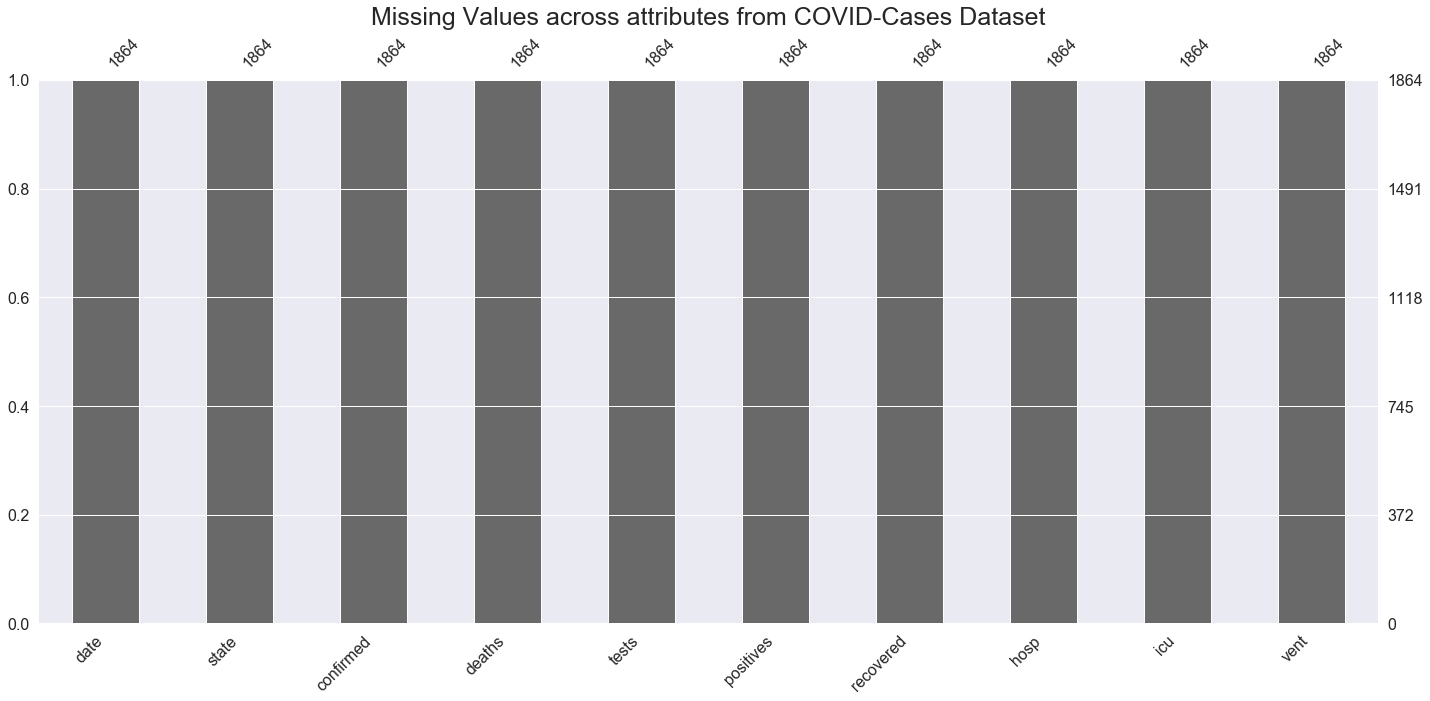

In [13]:
fig, ax = plt.subplots(figsize=(6,5)); #-----------------Setting size of the canvas

plt.title('Missing Values across attributes from COVID-Cases Dataset',fontsize=25, pad=10) #---------------------Title of the chart

msno.bar(covid_cases)

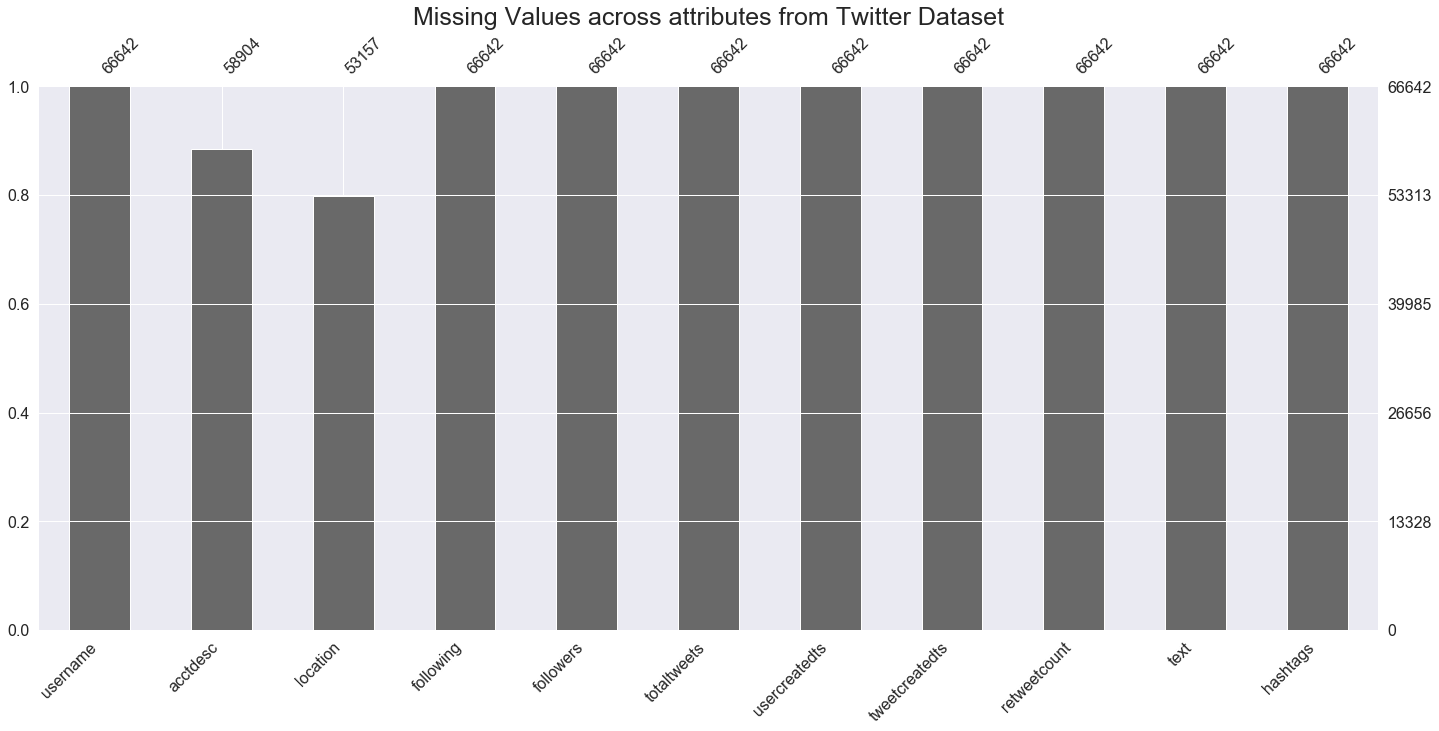

In [14]:
fig, ax = plt.subplots(figsize=(6,5)); #-----------------Setting size of the canvas

plt.title('Missing Values across attributes from Twitter Dataset',fontsize=25, pad=10) #---------------------Title of the chart

msno.bar(twitter_data)

In [15]:
twitter_data.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...,"[{'text': 'coronavirus', 'indices': [90, 102]}]"
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that's the case bigots, we sho...",[]
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that's the case bigots, we sho...",[]
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that's the case bigots, we sho...",[]
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP &amp; @VicGovAu’s response to...,"[{'text': 'homelessness', 'indices': [68, 81]}..."


In [16]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66642 entries, 0 to 741555
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   username        66642 non-null  object
 1   acctdesc        58904 non-null  object
 2   location        53157 non-null  object
 3   following       66642 non-null  object
 4   followers       66642 non-null  object
 5   totaltweets     66642 non-null  object
 6   usercreatedts   66642 non-null  object
 7   tweetcreatedts  66642 non-null  object
 8   retweetcount    66642 non-null  object
 9   text            66642 non-null  object
 10  hashtags        66642 non-null  object
dtypes: object(11)
memory usage: 6.1+ MB


In [17]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 1863
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1864 non-null   object
 1   state      1864 non-null   object
 2   confirmed  1864 non-null   int64 
 3   deaths     1864 non-null   int64 
 4   tests      1864 non-null   int64 
 5   positives  1864 non-null   int64 
 6   recovered  1864 non-null   int64 
 7   hosp       1864 non-null   int64 
 8   icu        1864 non-null   int64 
 9   vent       1864 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 160.2+ KB


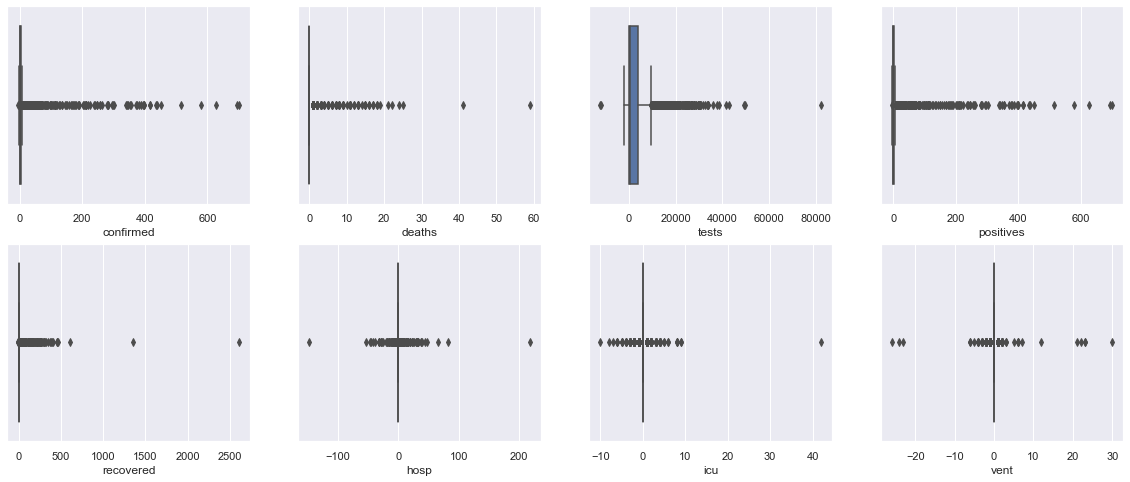

In [18]:
plt.figure(figsize=(20,8))
pos = 1
for i in ['confirmed','deaths','tests','positives','recovered','hosp','icu','vent']:
#     plt.title(i)
    plt.subplot(2, 4, pos)
    sns.boxplot(covid_cases[i])
    pos += 1 

In [19]:
covid_cases.describe().astype(int)

,confirmed,deaths,tests,positives,recovered,hosp,icu,vent
count,1864,1864,1864,1864,1864,1864,1864,1864
mean,14,0,3763,14,12,0,0,0
std,58,2,7120,58,81,8,1,1
min,-5,0,-12142,-5,-7,-147,-10,-26
25%,0,0,0,0,0,0,0,0
50%,0,0,664,0,0,0,0,0
75%,3,0,3802,3,1,0,0,0
max,700,59,82309,700,2605,218,42,30


In [20]:
for i in ['confirmed','deaths','tests','positives','recovered','hosp','icu','vent']:
    
    covid_cases[i]=covid_cases[i].apply(lambda x: 0 if x<0 else x)

Text(1, 1, 'Pair Plot - COVID-Cases Data')

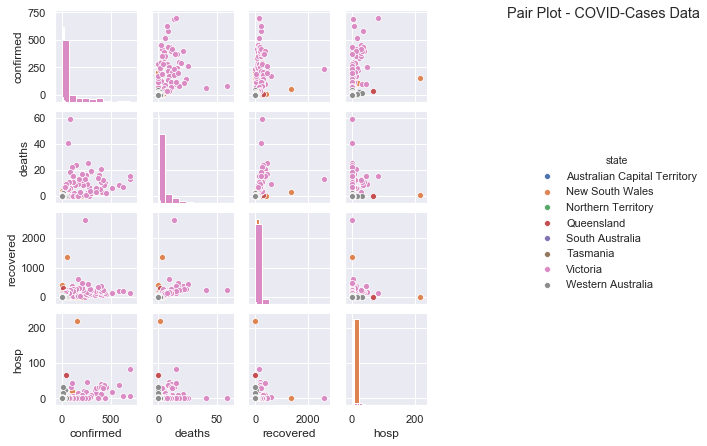

In [21]:
g=sns.pairplot(covid_cases[['state','confirmed','deaths','recovered','hosp']],hue='state',diag_kind='hist',height=1.5);
g.fig.suptitle("Pair Plot - COVID-Cases Data", x=1,y=1)

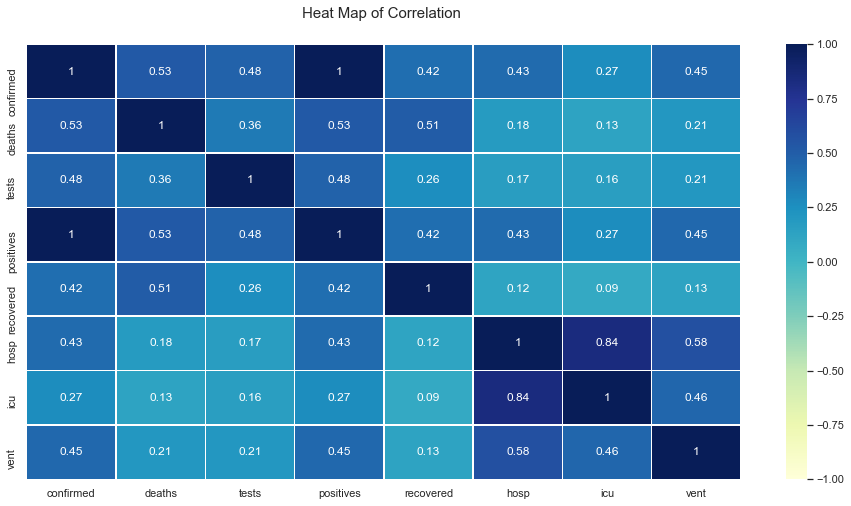

In [22]:
coor_chd_data = covid_cases.corr().round(2);

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

#--------------------------------------Plotting a heat map of different variables---------------------------------
plt.title('Heat Map of Correlation \n',fontsize=15, pad=10)

sns.heatmap(coor_chd_data,annot=True,cmap='YlGnBu',vmin=-1,vmax=1, linewidths=.5, center=0);

In [23]:
twitter_data.drop(['hashtags'],inplace=True,axis='columns')
twitter_data.head()


,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that's the case bigots, we sho..."
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that's the case bigots, we sho..."
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that's the case bigots, we sho..."
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP &amp; @VicGovAu’s response to...


In [24]:
# pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
# twitter_data.loc[[0]]

#### Data preprocessing for Sentiment Analysis

1. Remove html tags
2. Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
3. Remove numbers
4. Tokenization
5. To remove Stopwords
5. Lemmatized data
6. I have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
#------------------Importing Required Libraries--------------------------
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
# import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
twitter_data_req=twitter_data.copy()
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that's the case bigots, we sho..."
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that's the case bigots, we sho..."
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that's the case bigots, we sho..."
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP &amp; @VicGovAu’s response to...


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Removing html tags

In [28]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

twitter_data_req['text'] = twitter_data_req['text'].apply(lambda x: strip_html(x))
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that's the case bigots, we sho..."
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that's the case bigots, we sho..."
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that's the case bigots, we sho..."
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP & @VicGovAu’s response to #ho...


In [29]:
# Removal of the http link using Regular Expression.
for i, row in twitter_data_req.iterrows():
    clean_text = re.sub(r"http\S+", "", twitter_data_req.at[i, 'text']) #--Extracting anything that follows http till a space is encountered
    clean_text = re.sub(r"https",'',clean_text)
    twitter_data_req.at[i,'text'] = clean_text
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that's the case bigots, we sho..."
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that's the case bigots, we sho..."
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that's the case bigots, we sho..."
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP & @VicGovAu’s response to #ho...


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Removing contraction

In [30]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

twitter_data_req['text'] = twitter_data_req['text'].apply(lambda x: replace_contractions(x))
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that is the case bigots, we sh..."
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that is the case bigots, we sh..."
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that is the case bigots, we sh..."
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP & @VicGovAu’s response to #ho...


In [31]:
from langdetect import detect

twitter_data_req['Language'] = ""

for i, desc in enumerate(data['text']):
    try:
        twitter_data_req['Language'][i] = detect(desc)
    except:
        twitter_data_req['Language'][i] = 'unknown'
    

In [32]:
 twitter_data_req['Language'].value_counts()

      64675
en     9975
es       10
it       10
de        5
Name: Language, dtype: int64

In [33]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

twitter_data_req['text'] = twitter_data_req['text'].apply(lambda x: remove_numbers(x))
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,BREAKING: @VictoriaPolice and the state corone...,en
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"@InsidersABC If that is the case bigots, we sh...",en
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"@InsidersABC If that is the case bigots, we sh...",en
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"@InsidersABC If that is the case bigots, we sh...",en
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,@DanielAndrewsMP & @VicGovAu’s response to #ho...,en


In [34]:
twitter_data_req['text'] = twitter_data_req.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [38]:
twitter_data_req=twitter_data_req[~twitter_data_req['Language'].isin(['es','it','de'])]

In [39]:
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,"[BREAKING, :, @, VictoriaPolice, and, the, sta...",en
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,"[@, InsidersABC, If, that, is, the, case, bigo...",en
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,"[@, InsidersABC, If, that, is, the, case, bigo...",en
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,"[@, InsidersABC, If, that, is, the, case, bigo...",en
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,"[@, DanielAndrewsMP, &, @, VicGovAu, ’, s, res...",en


In [40]:
twitter_data_req.shape

(66642, 11)

In [42]:
twitter_data_req[twitter_data_req['Language']==''].head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language
126,viralvideovlogs,news news news and trends\n\nhttps://t.co/2ScZ...,കേരളം,4995,3241,233581,2018-01-13 18:33:01,2020-08-06 07:42:17,7,"[As, we, head, into, Semester, ,, we, wanted, ...",
128,5overthemoon,👩🏼‍🦼Experiencing worlds’ constant changes. An ...,England,225,566,37228,2013-07-25 21:07:10,2020-08-06 07:40:00,2,"[Time, to, be, sticklers, for, the, rules, ,, ...",
129,LelHulagirl101,Nurse Specialist Oncology/Palliative Care/Rese...,At the beach..... #McManusstan,5001,4288,264914,2015-02-07 02:49:40,2020-08-06 07:39:35,9,"[@, InsidersABC, If, that, is, the, case, bigo...",
132,crikey_news,Subscribe to Crikey and switch your media toda...,Australia,632,184783,48546,2008-05-12 05:06:03,2020-08-06 07:31:53,2,"[Time, to, be, sticklers, for, the, rules, ,, ...",
135,begcrochet,"Wannabe artist\nMental health, Art","Melbourne, Australia",1424,153,8750,2017-02-27 06:12:39,2020-08-06 07:27:03,4,"[It, feels, like, the, number, of, new, #, COV...",


In [43]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [44]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

twitter_data_req['text'] = twitter_data_req.apply(lambda row: normalize(row['text']), axis=1)
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,break victoriapolice state coroner investigate...,en
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,insidersabc case bigots sack governments aroun...,en
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,insidersabc case bigots sack governments aroun...,en
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,insidersabc case bigots sack governments aroun...,en
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,danielandrewsmp vicgovau response homelessness...,en


#### Topic Modeling

In [45]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, TfidfModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim

In [46]:
#Tokenisation
def desc_to_words(descs):
    for desc in descs:
        yield(gensim.utils.simple_preprocess(str(desc), deacc=True))

data_words = list(desc_to_words(twitter_data['text']))

# check first description
print(data_words[0])

['breaking', 'victoriapolice', 'and', 'the', 'state', 'coroner', 'will', 'investigate', 'cluster', 'of', 'coronavirus', 'related', 'deaths', 'among', 'residents', 'of', 'st', 'basil', 'aged', 'care', 'home', 'in', 'fawkner', 'there', 'have', 'been', 'deaths', 'at', 'the', 'facility', 'connected', 'with', 'covid', 'https', 'co', 'djz', 'it', 'emd']


In [47]:
# Create Dictinoary
id2word = corpora.Dictionary(data_words)
vocab_size = len(id2word)
print("Vocab size = ", vocab_size)

# Create Corpus
texts = data_words

# Term Document Frequency (Bag of Words)
bow_corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# View BOW and TFIDF for the first description
print(bow_corpus[0])
print(tfidf_corpus[0])

Vocab size =  17117
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 1)]
[(0, 0.1439437554875969), (1, 0.21727420015337823), (2, 0.06143564653451867), (3, 0.10812381788517643), (4, 0.20900142013432138), (5, 0.07401914641671523), (6, 0.1172332835347565), (7, 0.13358357961963407), (8, 0.2592055361950766), (9, 0.006090837319730591), (10, 0.26285350834845045), (11, 0.04306320776504891), (12, 0.2625083330308745), (13, 1.8724373495147512e-06), (14, 0.1063263946161713), (15, 0.26647260622988633), (16, 0.26647260622988633), (17, 0.25469642628175954), (18, 0.23525435317685622), (19, 0.05636175821589036), (20, 0.14918947877306857), (21, 0.006091559885020352), (22, 0.021270067174799703), (23, 0.26355257332588566), (24, 0.09407363903325747), (25, 0.

In [81]:
#Build an LDA model using BOW corpus
lda_model_bow = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=7,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [82]:
lda_model_bow.print_topics()

[(0,
  '0.139*"no" + 0.127*"dying" + 0.126*"year" + 0.068*"and" + 0.051*"it" + 0.033*"people" + 0.025*"with" + 0.024*"but" + 0.019*"letting" + 0.018*"regarding"'),
 (1,
  '0.156*"there" + 0.137*"new" + 0.113*"widespread" + 0.113*"contradict" + 0.113*"mxugu" + 0.112*"assumptions" + 0.104*"di" + 0.036*"of" + 0.020*"victoria" + 0.017*"watch"'),
 (2,
  '0.152*"lockdowns" + 0.146*"increase" + 0.050*"about" + 0.041*"you" + 0.032*"your" + 0.029*"they" + 0.027*"to" + 0.026*"don" + 0.023*"out" + 0.018*"from"'),
 (3,
  '0.463*"vic" + 0.089*"auspol" + 0.060*"coalition" + 0.018*"noeltowell" + 0.010*"is" + 0.009*"think" + 0.008*"disgusting" + 0.008*"stuff" + 0.008*"homophobic" + 0.008*"ychgvfzf"'),
 (4,
  '0.317*"to" + 0.153*"victorians" + 0.098*"are" + 0.040*"now" + 0.040*"we" + 0.022*"than" + 0.015*"very" + 0.013*"us" + 0.013*"helped" + 0.012*"way"'),
 (5,
  '0.106*"data" + 0.100*"about" + 0.098*"number" + 0.098*"findings" + 0.098*"shows" + 0.026*"at" + 0.016*"months" + 0.016*"facilities" + 0.015

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_bow, bow_corpus, id2word)
vis

In [83]:
for topic_id in range(lda_model_bow.num_topics):
    topk = lda_model_bow.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: no dying year and it people with but letting regarding
1: there new widespread contradict mxugu assumptions di of victoria watch
2: lockdowns increase about you your they to don out from
3: vic auspol coalition noeltowell is think disgusting stuff homophobic ychgvfzf
4: to victorians are now we than very us helped way
5: data about number findings shows at months facilities behaviour rip
6: here need safe says proud daily down going numbers issue
7: breaking trying morrison talk springst state andrews needs care past
8: this for as amp govt agedcarecrisis be again shutdown plan
9: the covid of co https by has coronavirus been impact


In [51]:
from operator import itemgetter

twitter_data['Topic']=''

for i, row in twitter_data_req.iterrows():
    text = twitter_data_req.at[i, 'text']

    doc = text.split()

    doc_vector = lda_model_bow.id2word.doc2bow(doc)
    doc_topics = lda_model_bow[doc_vector]
   
    res = max(doc_topics[0], key = itemgetter(1))[0] 
    twitter_data_req.at[i, 'Topic']=int(res)

In [52]:
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language,Topic
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,break victoriapolice state coroner investigate...,en,9.0
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,insidersabc case bigots sack governments aroun...,en,9.0
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,insidersabc case bigots sack governments aroun...,en,9.0
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,insidersabc case bigots sack governments aroun...,en,9.0
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,danielandrewsmp vicgovau response homelessness...,en,9.0


In [54]:
twitter_data_req['Topic'].value_counts()

9.0    59978
3.0     4313
2.0      859
5.0      644
0.0      444
8.0      165
4.0      149
6.0       51
1.0       32
7.0        7
Name: Topic, dtype: int64

https://textblob.readthedocs.io/en/dev/quickstart.html

In [55]:
from textblob import TextBlob

In [56]:
def sentiment_calc_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [57]:
def sentiment_calc_subjectivity(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

In [58]:
twitter_data_req['polarity']=twitter_data_req['text'].apply(sentiment_calc_polarity)
twitter_data_req['subjectivity']=twitter_data_req['text'].apply(sentiment_calc_subjectivity)
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language,Topic,polarity,subjectivity
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,break victoriapolice state coroner investigate...,en,9.0,0.00,0.00
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,danielandrewsmp vicgovau response homelessness...,en,9.0,-0.50,0.50


In [59]:
twitter_data_req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66642 entries, 0 to 741555
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        66642 non-null  object 
 1   acctdesc        58904 non-null  object 
 2   location        53157 non-null  object 
 3   following       66642 non-null  object 
 4   followers       66642 non-null  object 
 5   totaltweets     66642 non-null  object 
 6   usercreatedts   66642 non-null  object 
 7   tweetcreatedts  66642 non-null  object 
 8   retweetcount    66642 non-null  object 
 9   text            66642 non-null  object 
 10  Language        66642 non-null  object 
 11  Topic           66642 non-null  float64
 12  polarity        66642 non-null  float64
 13  subjectivity    66642 non-null  float64
dtypes: float64(3), object(11)
memory usage: 10.1+ MB


In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [61]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores_pos(text):
    score = analyser.polarity_scores(text)
    return score['pos']

def sentiment_analyzer_scores_neg(text):
    score = analyser.polarity_scores(text)
    return score['neg']

def sentiment_analyzer_scores_neu(text):
    score = analyser.polarity_scores(text)
    return score['neu']

In [62]:
twitter_data_req['positive']=twitter_data_req['text'].apply(sentiment_analyzer_scores_pos)
twitter_data_req['negative']=twitter_data_req['text'].apply(sentiment_analyzer_scores_neg)
twitter_data_req['neutral']=twitter_data_req['text'].apply(sentiment_analyzer_scores_neu)

In [63]:
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language,Topic,polarity,subjectivity,positive,negative,neutral
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,break victoriapolice state coroner investigate...,en,9.0,0.00,0.00,0.144,0.000,0.856
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35,0.000,0.000,1.000
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35,0.000,0.000,1.000
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35,0.000,0.000,1.000
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,danielandrewsmp vicgovau response homelessness...,en,9.0,-0.50,0.50,0.179,0.214,0.607


In [64]:
twitter_data_req.describe()

,Topic,polarity,subjectivity,positive,negative,neutral
count,66642.000000,66642.000000,66642.000000,66642.000000,66642.000000,66642.000000
mean,8.402839,0.041152,0.450069,0.149799,0.142078,0.708123
std,1.842720,0.210224,0.243082,0.189385,0.123325,0.183345
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.171000
25%,9.000000,-0.121212,0.333333,0.000000,0.000000,0.593000
50%,9.000000,0.000000,0.504735,0.102000,0.151000,0.765000
75%,9.000000,0.136364,0.555556,0.206000,0.203000,0.829000
max,9.000000,1.000000,1.000000,0.808000,0.829000,1.000000


In [65]:
twitter_data_req['Sentiment']=twitter_data_req[['positive','negative','neutral']].idxmax(axis=1)

In [66]:
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,Language,Topic,polarity,subjectivity,positive,negative,neutral,Sentiment
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,break victoriapolice state coroner investigate...,en,9.0,0.00,0.00,0.144,0.000,0.856,neutral
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35,0.000,0.000,1.000,neutral
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35,0.000,0.000,1.000,neutral
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,insidersabc case bigots sack governments aroun...,en,9.0,0.05,0.35,0.000,0.000,1.000,neutral
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,danielandrewsmp vicgovau response homelessness...,en,9.0,-0.50,0.50,0.179,0.214,0.607,neutral


In [67]:
twitter_data_req['Sentiment'].value_counts()

neutral     57397
positive     8335
negative      910
Name: Sentiment, dtype: int64

In [68]:
from datetime import datetime
twitter_data_req['CreateDate']=twitter_data_req['usercreatedts'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) #--Converting data to python date format
twitter_data_req['TweetDate']=twitter_data_req['tweetcreatedts'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) #--Converting data to python date format

In [69]:
# twitter_data_req['start_day'] = twitter_data_req['TweetDate'].dt.day
twitter_data_req['start_hour'] = twitter_data_req['TweetDate'].dt.hour
# twitter_data_req['start_month'] = twitter_data_req['TweetDate'].dt.month
twitter_data_req['d_of_wk'] = twitter_data_req['TweetDate'].dt.dayofweek   # Days encoded as 0-6  ( monday =0, Tue =1 .... )
# twitter_data_req['quarter']=twitter_data_req['TweetDate'].dt.quarter
twitter_data_req['d_of_wk'] = twitter_data_req['TweetDate'].apply(lambda x : datetime.strftime(x,'%a'))

In [70]:
twitter_data_req.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,...,polarity,subjectivity,positive,negative,neutral,Sentiment,CreateDate,TweetDate,start_hour,d_of_wk
0,aconvict,Prisoner of Hope,NaN,5002,2332,254131,2008-11-01 12:09:45,2020-08-06 07:47:16,24,break victoriapolice state coroner investigate...,...,0.00,0.00,0.144,0.000,0.856,neutral,2008-11-01 12:09:45,2020-08-06 07:47:16,7,Thu
1,TyrendarraBoy,Restez ala maison Stay Home I hate with a pass...,FNQ,485,333,20393,2009-03-06 12:58:23,2020-08-06 07:46:38,9,insidersabc case bigots sack governments aroun...,...,0.05,0.35,0.000,0.000,1.000,neutral,2009-03-06 12:58:23,2020-08-06 07:46:38,7,Thu
2,MichaelColl5,Abstract expressionist artist. Large Canvas wo...,"Daylesford, Victoria Australia",933,1612,152368,2013-09-15 04:58:52,2020-08-06 07:45:47,9,insidersabc case bigots sack governments aroun...,...,0.05,0.35,0.000,0.000,1.000,neutral,2013-09-15 04:58:52,2020-08-06 07:45:47,7,Thu
3,slsandpet,"TV tragic, news junkie media PhD, Enviro Board...",Aust,3497,9767,466322,2013-07-31 04:08:38,2020-08-06 07:45:09,9,insidersabc case bigots sack governments aroun...,...,0.05,0.35,0.000,0.000,1.000,neutral,2013-07-31 04:08:38,2020-08-06 07:45:09,7,Thu
4,tasdeviel,"PhD student @UTAS_ studying Tassie devils, quo...","Hobart, Tasmania",898,478,642,2016-01-15 00:33:43,2020-08-06 07:43:07,2,danielandrewsmp vicgovau response homelessness...,...,-0.50,0.50,0.179,0.214,0.607,neutral,2016-01-15 00:33:43,2020-08-06 07:43:07,7,Thu


In [71]:
twitter_data_req['location'].value_counts()

Melbourne, Victoria            8125
Melbourne, Australia           5914
Australia                      4165
Melbourne                      3727
Victoria, Australia            1259
                               ... 
Asia                              1
Cammeraygal, Australia            1
Cox's Bazar, Bangladesh           1
iPhone: 52.537005,-1.400207       1
North Warrandyte, Melbourne       1
Name: location, Length: 2098, dtype: int64

In [72]:
covid_cases.head()

,date,state,confirmed,deaths,tests,positives,recovered,hosp,icu,vent
0,2020-01-25,Australian Capital Territory,0,0,0,0,0,0,0,0
1,2020-01-25,New South Wales,3,0,0,0,0,0,0,0
2,2020-01-25,Northern Territory,0,0,0,0,0,0,0,0
3,2020-01-25,Queensland,0,0,0,0,0,0,0,0
4,2020-01-25,South Australia,0,0,0,0,0,0,0,0


In [73]:
covid_cases.columns

Index(['date', 'state', 'confirmed', 'deaths', 'tests', 'positives',
       'recovered', 'hosp', 'icu', 'vent'],
      dtype='object')

In [74]:
cols=['confirmed', 'deaths', 'tests', 'positives','recovered', 'hosp', 'icu', 'vent']

for i in cols:
    covid_cases[i]=covid_cases[i].apply(lambda x: 0 if x<0 else x)

In [75]:
covid_cases.describe().astype(int)

,confirmed,deaths,tests,positives,recovered,hosp,icu,vent
count,1864,1864,1864,1864,1864,1864,1864,1864
mean,14,0,3781,14,12,0,0,0
std,58,2,7100,58,81,6,1,1
min,0,0,0,0,0,0,0,0
25%,0,0,0,0,0,0,0,0
50%,0,0,664,0,0,0,0,0
75%,3,0,3802,3,1,0,0,0
max,700,59,82309,700,2605,218,42,30


In [76]:
covid_cases.to_csv('D:/Data Visualization - Assignments/Project 1/Cases.csv')

In [77]:
twitter_data_req.to_csv('D:/Data Visualization - Assignments/Project 1/Tweets.csv')

In [84]:
highlights = [\
              # https://www.pm.gov.au/media/update-novel-coronavirus-covid-19-australia
              ['2020-03-01', 'Iran + China arrivals blocked'], \
              
              # https://www.pm.gov.au/media/advice-coronavirus
              # NB: technically this became effective 16th, but
              # the announcement itself may have been enough to 
              # trigger some behaviour modification
              ['2020-03-13', 'Outdoor gatherings limited to 500 persons'],\
              
              # https://www.pm.gov.au/media/coronavirus-measures-endorsed-national-cabinet
              ['2020-03-16', 'Self-isolation for overseas travellers, cruise ships blocked for 30 days'],\
              
              # https://www.pm.gov.au/media/update-coronavirus-measures
              ['2020-03-18', 'Indoor gatherings limited to 100 persons, outdoors still 500'],\
             
              # https://www.pm.gov.au/media/border-restrictions
              ['2020-03-19', 'Borders closed to non-citizens and residents', '0 days', 1.1],\

              # https://www.pm.gov.au/media/update-coronavirus-measures-220320
              ['2020-03-23', 'Pubs / clubs closed, restaurants take-away only', '-1 Day'],\
              
              # https://www.pm.gov.au/media/update-coronavirus-measures-24-March-2020
              ['2020-03-24', 'Ban on Australians travelling overseas'],\

              # https://www.pm.gov.au/media/national-cabinet-update
              ['2020-03-26', 'Expanded testing criteria', '-0.5 day'],\

              # https://www.pm.gov.au/media/update-coronavirus-measures-270320
              ['2020-03-28', 'Mandatory isolation in hotels for all travellers', '-1 day'],\

              # https://www.pm.gov.au/media/national-cabinet-statement
              ['2020-03-30', 'Outdoor / indoor gatherings 2 persons only', '-1 day', 1.1],\

              # https://www.pm.gov.au/media/update-coronavirus-measures-210420
              ['2020-04-27', 'Certain elective surgeries permitted', '0 days', 1.5],\

              # https://www.abc.net.au/news/2020-04-24/coronavirous-nsw-premier-confirms-seven-new-cases/12180126
              ['2020-04-24', '(NSW) Testing now open to everyone', '0 days', 1.2],\

              # https://www.abc.net.au/news/2020-04-28/nsw-coronavirus-lockdown-to-be-relaxed-gladys-berejiklian-says/12190284
              ['2020-05-01', '(NSW) Groups of 2 adults + kids allowed to visit friends', '0 days', 1.8],

              # https://www.nsw.gov.au/covid-19/education
              ['2020-05-11', '(NSW) School attendance 1 day/week', '0 days', 2.9],

              # https://www.nsw.gov.au/covid-19/what-you-can-and-cant-do-under-rules/changes#what-is-changing-on-15-may
              ['2020-05-15', '(NSW) Public gatherings for <= 10 ppl. Restaurants open for <= 10 ppl. Playgrounds open. More', '0 days', 3.7],

              # https://education.nsw.gov.au/news/latest-news/nsw-students-return-to-the-classroom-full-time
              ['2020-05-25', '(NSW) Schools returning full-time', '0 days', 4.6],

              # https://www.nsw.gov.au/covid-19/what-you-can-and-cant-do-under-rules
              ['2020-06-01', '(NSW) Pubs / galleries open for <= 50 ppl. Salons open. Regional travel allowed', '0 days', 5.5],

              # https://www.nsw.gov.au/news/gyms-and-kids-sports-to-reopen-across-nsw
              ['2020-06-13', '(NSW) Gyms, indoor pools, yoga and dance studios reopen', '0 days', 6.5]
             ]

In [87]:
data_events=pd.DataFrame(highlights)

In [88]:
data_events.columns=['Date','Event','Days','Y']
data_events.head()

,Date,Event,X,Y
0,2020-03-01,Iran + China arrivals blocked,None,NaN
1,2020-03-13,Outdoor gatherings limited to 500 persons,None,NaN
2,2020-03-16,"Self-isolation for overseas travellers, cruise...",None,NaN
3,2020-03-18,"Indoor gatherings limited to 100 persons, outd...",None,NaN
4,2020-03-19,Borders closed to non-citizens and residents,0 days,1.1


In [89]:
data_events.to_csv('D:/Data Visualization - Assignments/Project 1/Events.csv')

#### Preparing Data for Sanky Chart

In [91]:
data_topic_user=twitter_data_req[['Topic','username']]
data_topic_user.drop_duplicates(keep='first',inplace=True)

In [92]:
data_topic_user.shape

(7765, 2)

In [99]:
list_topics=[0,1,2,3,4,5,6,7,8,9]

list_1=[]
list_2=[]
count_d=[]

for i in list_topics:
    for j in list_topics:
        data_1=data_topic_user[data_topic_user['Topic']==i]
        data_2=data_topic_user[data_topic_user['Topic']==j]
        list_1.append(i)
        list_2.append(j)
        
        join_data=data_1.merge(data_2,how='inner',on="username")
        count_d.append(join_data['username'].count())



In [100]:
sanky_data=pd.DataFrame()
sanky_data['Topic A']=list_1
sanky_data['Topic B']=list_2
sanky_data['Count']=count_d

sanky_data.head()

,Topic A,Topic B,Count
0,0,0,96
1,0,1,0
2,0,2,2
3,0,3,2
4,0,4,0


In [101]:
sanky_data.to_csv('Connection.csv')